In [1]:
import re

def calibrate(raw, YZ, AD, YCF, YAG, ADCMAX):
    return list(map(lambda x: (x - YZ) * AD / (YCF * YAG * (ADCMAX + 1)), raw))


with open('nat_006.EDR', 'rb') as my_file:
    # Read the data file in its entirety and get the head and data contents.
    data = my_file.read()
    header = data[:2049].decode('ASCII')
    contents = data[2049:]

    # Convert the contents from bytes to integers.
    parsed = list(contents)

    # Find the conversion parameters from the header.
    YZn = re.findall(r'(?<=YZ\d=)\-?\d+\.?\d*',header)
    AD = re.findall(r'(?<=AD=)\-?\d+\.?\d*',header)
    YCFn = re.findall(r'(?<=YCF\d=)\-?\d+\.?\d*',header)
    YAGn = re.findall(r'(?<=YAG\d=)\-?\d+\.?\d*',header)
    ADCMAX = re.findall(r'(?<=ADCMAX=)\-?\d+\.?\d*',header)

    # How many signals are there?
    num_signals = len(YZn)
    
    # Separate signals
    split = [parsed[i::num_signals] for i in range(num_signals)]
        
    # Convert signals to adjusted readings
    calibrated = [calibrate(split[i], float(YZn[i]), float(AD[0]), float(YCFn[i]), float(YAGn[i]), float(ADCMAX[0])) for i in range(num_signals)]

print(header)
print('YZn:', YZn)
print('AD:', AD)
print('YCFn:', YCFn)
print('YAGn:', YAGn)
print('ADCMAX:', ADCMAX)
input('Press ENTER to continue')
print(calibrated[0][:100])



VER=6.1
CTIME=
ADCMAX=2047
NBH=2048
NC=2
AD=10.23
NP=834369
DT=0.0001
DETCH=0
DETRS=512
DETYT=0
DETTT=0.01
DETDD=0.512
DETBAI=1
DETPF=0.1
DETAW=0
DETPOSPK=F
DETBASST=F
DETBASSUB=F
DETBASPTS=20
DETBASGAP=0
DETTDECP=90
DETDECFR=0
DETREW=20
DETEBT=F
VARRS=32
VAROV=0
VARTR=0
VARTD=0
UNITC=0
DWTTH=0
DWTSARLO=0
DWTSARHI=0
DWTSABLK=0
DWTEVRLO=0
DWTEVRHI=0
DWTEVBLK=0
DWTNCPP=0
YO0=0
YU0=pA
YN0=Im
YCF0=0.0005
YAG0=1000
YZ0=0
YR0=-1
YO1=1
YU1=mV
YN1=Vm
YCF1=0.01
YAG1=1
YZ1=0
YR1=-1
ID=
WCPFNAM=
BAK=F
MKN=0
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

MAGIC_NUM = 100000
plt.plot(range(MAGIC_NUM), calibrated[0][:MAGIC_NUM])

plt.show()

last read was ch1
last read was ch0
last read was ch1


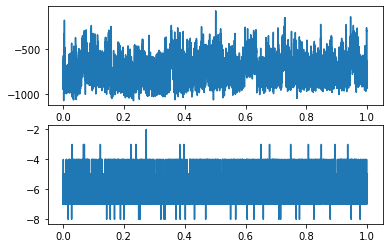

In [17]:
import struct
ch0=[]
ch1=[]
with open("nat_006.EDR", "rb") as f:
    byte = f.read(2)
    counter = 0
    while byte:
        # Do stuff with byte.
        byte = f.read(2)
        counter=counter+2
        if counter>=2049:           
            try:
                ch0.append(struct.unpack('h',byte))
            except:
                print('last read was ch0')      
            byte = f.read(2)
            try:
                ch1.append(struct.unpack('h',byte))
            except:
                print('last read was ch1')
                
                       
            
# h = signed short, H = unsigned short

import matplotlib.pyplot as plt

t=range(len(ch0))
t=[s*0.0001 for s in t]
plt.subplot(211)
plt.plot(t[:10000],ch1[:10000])
t=range(len(ch1))
t=[s*0.0001 for s in t]
plt.subplot(212)
plt.plot(t[:10000],ch0[:10000])

plt.show()

In [ ]:
print( len(ch0))